<a href="https://colab.research.google.com/github/wj198414/ASTRON1221/blob/main/DarkMatter/galaxy_rotatio_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import astropy
import numpy as np

In [2]:
import astropy.units as u
import astropy.constants as ac

In [3]:
import matplotlib.pyplot as plt
import astropy.io.ascii

In [4]:
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [5]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

(0.0, 300.0)

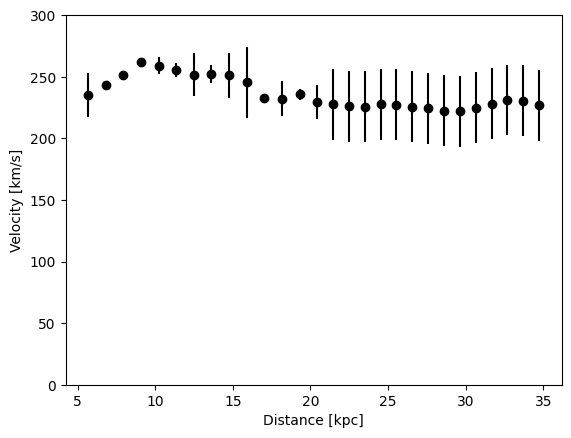

In [6]:
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o')
plt.xlabel("Distance [kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)

In [7]:
def calc_rotational_velocity(central_mass, radius):
  rotation_velocity = (np.sqrt(ac.G * central_mass / (radius)))
  return(rotation_velocity.si)

In [8]:
galaxy_stellar_mass = 1e0 * u.earthMass
radius = 1 * u.earthRad
print(calc_rotational_velocity(galaxy_stellar_mass, radius))

7905.388234385281 m / s


Now let's see if a central black hole can cause the observed rotation curve

In [9]:
central_black_hole_mass = 4e6 * u.solMass
radius_arr = np.array(tab["col2"].data) * 1000 * u.parsec
rotational_velocity_arr = (calc_rotational_velocity(central_black_hole_mass, radius_arr))

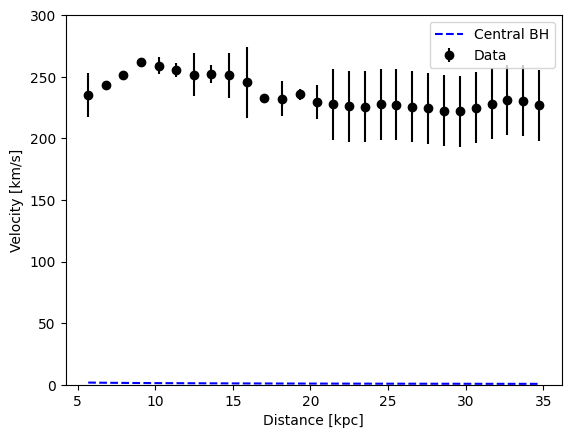

In [10]:
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")
plt.plot(radius_arr.value / 1e3, rotational_velocity_arr.to(u.km / u.s).value, color="blue", linestyle="dashed", label="Central BH")
plt.xlabel("Distance [kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()

In [11]:
print(rotational_velocity_arr)

[1740.34909685 1589.41381709 1471.04844655 1376.47274273 1297.43345474
 1231.15464877 1173.62491571 1123.88528818 1079.61115027 1040.51558963
 1005.08598243  973.3132105   944.13019104  917.64849515  895.56454516
  875.0019157   855.61149168  837.62630418  820.72959406  804.81582025
  789.79323444  775.58164684  762.11061897  749.19574236  737.03227862
  725.44264143  714.38308652  703.81440029] m / s


Now let's add a bulge component. Googling milky way bulge mass and radius return: M\~2e10 solar mass and R\~2 kpc, so the density is about ρ\~M/(4π/3×$R^3$)

In [26]:
mass_bulge = 9e10 * u.solMass
radius_bulge = 3e3 * u.parsec
density_bulge = mass_bulge / (4 * np.pi / 3 * radius_bulge**3)

In [27]:
def calc_bulge_mass(density, radius):
  if radius < (2e3 * u.parsec):
    volume = 4 * np.pi / 3 * (radius)**3
    bulge_mass = density * volume
  else:
    bulge_mass = mass_bulge
  return(bulge_mass)

In [28]:
# bulge_mass_arr = calc_bulge_mass(density_bulge , radius_arr)
# rotational_velocity_bulge_arr = (calc_rotational_velocity(bulge_mass_arr, radius_arr))

Think what is wrong above?

In [29]:
bulge_mass_arr = np.zeros(np.shape(radius_arr)) * u.solMass
for i, radius in enumerate(radius_arr):
  bulge_mass_arr[i] = calc_bulge_mass(density_bulge, radius_arr[i])
rotational_velocity_bulge_arr = (calc_rotational_velocity(bulge_mass_arr, radius_arr))

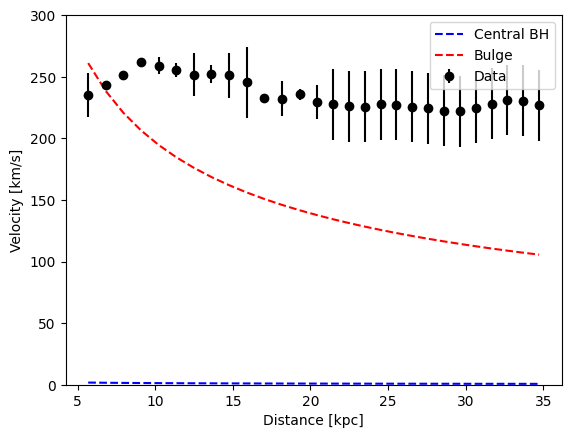

In [30]:
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")
plt.plot(radius_arr.value / 1e3, rotational_velocity_arr.to(u.km / u.s).value, color="blue", linestyle="dashed", label="Central BH")
plt.plot(radius_arr.value / 1e3, rotational_velocity_bulge_arr.to(u.km / u.s).value, color="red", linestyle="dashed", label="Bulge")
plt.xlabel("Distance [kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()

How about adding one more comoponent, the disk which is 2D?

In [31]:
disk_mass = 8e10 * u.solMass
disk_radius = 30e3 * u.parsec
disk_density = disk_mass / (np.pi * disk_radius**2)

def calc_disk_mass(density, radius):
  area = np.pi * (radius)**2
  disk_mass = density * area
  return(disk_mass)

In [32]:
disk_mass_arr = calc_disk_mass(disk_density , radius_arr)
rotational_velocity_disk_arr = (calc_rotational_velocity(disk_mass_arr, radius_arr))

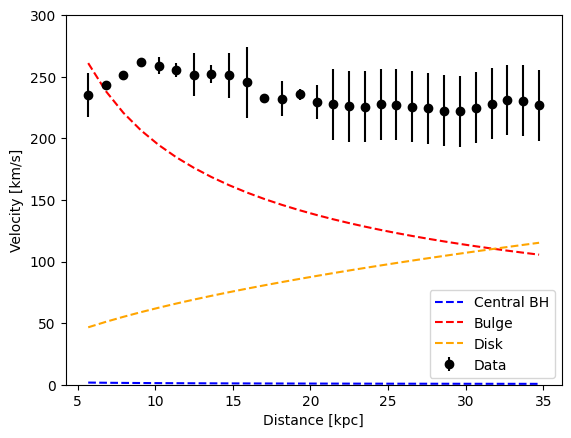

In [33]:
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")
plt.plot(radius_arr.value / 1e3, rotational_velocity_arr.to(u.km / u.s).value, color="blue", linestyle="dashed", label="Central BH")
plt.plot(radius_arr.value / 1e3, rotational_velocity_bulge_arr.to(u.km / u.s).value, color="red", linestyle="dashed", label="Bulge")
plt.plot(radius_arr.value / 1e3, rotational_velocity_disk_arr.to(u.km / u.s).value, color="orange", linestyle="dashed", label="Disk")
plt.xlabel("Distance [kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()

In [34]:
def calc_dark_matter_mass(density, radius):
  volume = 4 * np.pi / 3 * (radius)**3
  dark_matter_mass = density * volume
  return(dark_matter_mass)

In [40]:
dark_matter_density = 3e6 / 1.4 * u.solMass / (1000 * u.parsec)**3
dark_matter_mass_arr = calc_dark_matter_mass(dark_matter_density , radius_arr)
rotational_velocity_dark_matter_arr = (calc_rotational_velocity(dark_matter_mass_arr, radius_arr))

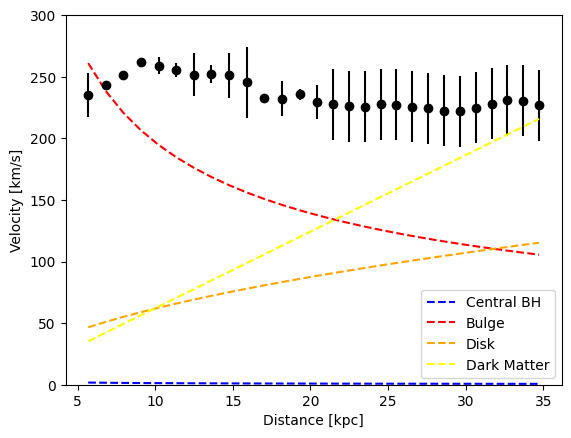

In [41]:
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o')
plt.plot(radius_arr.value / 1e3, rotational_velocity_arr.to(u.km / u.s).value, color="blue", linestyle="dashed", label="Central BH")
plt.plot(radius_arr.value / 1e3, rotational_velocity_bulge_arr.to(u.km / u.s).value, color="red", linestyle="dashed", label="Bulge")
plt.plot(radius_arr.value / 1e3, rotational_velocity_disk_arr.to(u.km / u.s).value, color="orange", linestyle="dashed", label="Disk")
plt.plot(radius_arr.value / 1e3, rotational_velocity_dark_matter_arr.to(u.km / u.s).value, color="yellow", linestyle="dashed", label="Dark Matter")
plt.xlabel("Distance [kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()

In [42]:
dark_matter_density_local = 0.3 * 1e9 * u.eV / ac.c**2 / u.cm**3
print(dark_matter_density_local.si)
print(dark_matter_density_local.to(u.solMass / (1e3 * u.parsec)**3))


5.347985764883693e-22 kg / m3
7901980.759857409 1e-09 solMass / pc3


In [43]:
rotational_velocity_all_arr = (calc_rotational_velocity(dark_matter_mass_arr + disk_mass_arr + \
                                                        bulge_mass_arr + central_black_hole_mass, radius_arr))

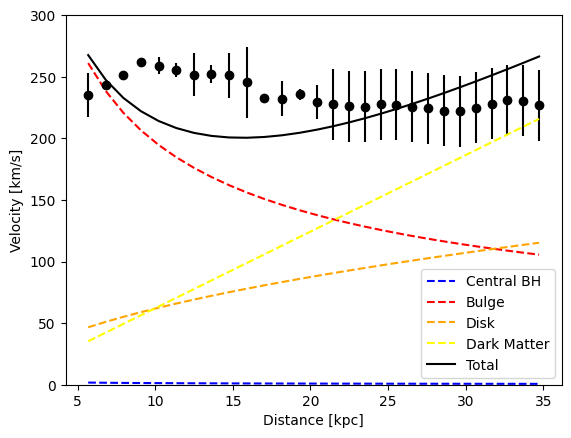

In [44]:
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o')
plt.plot(radius_arr.value / 1e3, rotational_velocity_arr.to(u.km / u.s).value, color="blue", linestyle="dashed", label="Central BH")
plt.plot(radius_arr.value / 1e3, rotational_velocity_bulge_arr.to(u.km / u.s).value, color="red", linestyle="dashed", label="Bulge")
plt.plot(radius_arr.value / 1e3, rotational_velocity_disk_arr.to(u.km / u.s).value, color="orange", linestyle="dashed", label="Disk")
plt.plot(radius_arr.value / 1e3, rotational_velocity_dark_matter_arr.to(u.km / u.s).value, color="yellow", linestyle="dashed", label="Dark Matter")
plt.plot(radius_arr.value / 1e3, rotational_velocity_all_arr.to(u.km / u.s).value, color="black", label="Total")
plt.xlabel("Distance [kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()

In [47]:
D = tab["col3"] # This is the data
M = rotational_velocity_all_arr.to(u.km / u.s).value # This the predicted model
E = tab["col4"] # This is the error

In [48]:
Chi2 = np.sum(((M - D) / E)**2)

https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic, definition of reduced Chi2

In [51]:
print(Chi2)

2323.696169724818


In [52]:
m = 4 # degree of freedom
reduced_Chi2 = Chi2 / (len(D) - 4)
print(reduced_Chi2)

96.82067373853408
